# RQ1: Intracluster and Intercluster Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance

pd.options.display.float_format = '{:,.3f}'.format

In [2]:
base_dir = "../trained_models/AWP/1000val/full/"
def load_data(train, test, fname, valtest=None) :
    if valtest == None :
        fpath = base_dir + "{}/eval/best/{}/{}.txt".format(train, test, fname)
    else :
        fpath = base_dir + "{}/val/{}/best/{}/{}.txt".format(train, valtest, test, fname)

    return np.loadtxt(fpath).astype(np.int)

train = "autoattack"
test = "pgd"

y_original = load_data(train, test, "Y_original", 1000)
y_original_pred = load_data(train, test, "Y_original_pred", 1000)
y_adv = load_data(train, test, "Y_adv", 1000)
y_adv_pred = load_data(train, test, "Y_adv_pred", 1000)

In [3]:
def get_robust_data(train, test, valtest=None):
    y_adv = load_data(train, test, "Y_adv", valtest)
    y_adv_pred = load_data(train, test, "Y_adv_pred", valtest)
    return y_adv, y_adv_pred

train = "pgd"
test = "autoattack"
y_adv, y_adv_pred = get_robust_data(train, test, None)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(pgd,autoattack): [3 8 8 ... 5 1 7]
Y_adv_pred(pgd,autoattack): [3 8 8 ... 5 1 7]


In [4]:
attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack", "spatialtransformation"]

In [5]:
train = attacks.copy()

test = attacks.copy()
test.append("all")

In [6]:
def get_accuracies(attacks, valtest=None) :
    predictions = {}
    labels = {}

    for a1 in train :
        p = np.array([])
        l = np.array([])
        for a2 in attacks :
            y, y_pred = get_robust_data(a1, a2, valtest)
            p = np.concatenate((p, y_pred))
            l = np.concatenate((l, y))
        predictions[a1] = {}
        labels[a1] = {}
        predictions[a1]["all"] = p
        labels[a1]["all"] = l

    for a1 in train :
        for a2 in attacks :
            y, y_pred = get_robust_data(a1, a2, valtest)
            predictions[a1][a2] = y_pred
            labels[a1][a2] = y

    accs = {}
    for tr in train :
        accs[tr] = {}
        for ts in test :
            accs[tr][ts] = (labels[tr][ts] == predictions[tr][ts]).sum().item() / len(labels[tr][ts])


    accs = pd.DataFrame(data=accs)
    accs_transpose = pd.DataFrame(data=accs).T
    return accs_transpose, accs 

accs_transpose, accs = get_accuracies(attacks, 1000)

In [7]:
accs_transpose

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation,all
autoattack,0.789,0.789,0.779,0.795,0.764,0.773,0.776,0.788,0.788,0.171,0.393,0.691
autopgd,0.782,0.783,0.774,0.791,0.770,0.787,0.782,0.790,0.783,0.142,0.351,0.685
bim,0.785,0.785,0.780,0.779,0.757,0.773,0.773,0.780,0.771,0.129,0.402,0.683
cw,0.781,0.781,0.776,0.805,0.768,0.772,0.789,0.803,0.798,0.144,0.380,0.691
fgsm,0.776,0.776,0.775,0.779,0.774,0.768,0.768,0.780,0.770,0.159,0.365,0.681
pgd,0.773,0.773,0.775,0.791,0.756,0.779,0.769,0.784,0.781,0.110,0.372,0.678
deepfool,0.780,0.780,0.782,0.793,0.765,0.786,0.787,0.794,0.783,0.148,0.360,0.687
newtonfool,0.778,0.778,0.773,0.799,0.764,0.763,0.778,0.801,0.800,0.149,0.384,0.688
squareattack,0.725,0.726,0.723,0.777,0.709,0.719,0.739,0.773,0.835,0.223,0.369,0.665
pixelattack,0.089,0.089,0.089,0.089,0.089,0.089,0.089,0.089,0.089,0.786,0.089,0.152


In [8]:
sorted_acc = accs_transpose.sort_values(by="all", ascending=False)
idx = list(sorted_acc.index)
sorted_acc = sorted_acc.reindex(idx, axis=0)
idx.append("all")
sorted_acc = sorted_acc.reindex(idx, axis=1)
sorted_acc

,autoattack,cw,newtonfool,deepfool,autopgd,bim,fgsm,pgd,squareattack,spatialtransformation,pixelattack,all
autoattack,0.789,0.795,0.788,0.776,0.789,0.779,0.764,0.773,0.788,0.393,0.171,0.691
cw,0.781,0.805,0.803,0.789,0.781,0.776,0.768,0.772,0.798,0.380,0.144,0.691
newtonfool,0.778,0.799,0.801,0.778,0.778,0.773,0.764,0.763,0.800,0.384,0.149,0.688
deepfool,0.780,0.793,0.794,0.787,0.780,0.782,0.765,0.786,0.783,0.360,0.148,0.687
autopgd,0.782,0.791,0.790,0.782,0.783,0.774,0.770,0.787,0.783,0.351,0.142,0.685
bim,0.785,0.779,0.780,0.773,0.785,0.780,0.757,0.773,0.771,0.402,0.129,0.683
fgsm,0.776,0.779,0.780,0.768,0.776,0.775,0.774,0.768,0.770,0.365,0.159,0.681
pgd,0.773,0.791,0.784,0.769,0.773,0.775,0.756,0.779,0.781,0.372,0.110,0.678
squareattack,0.725,0.777,0.773,0.739,0.726,0.723,0.709,0.719,0.835,0.369,0.223,0.665
spatialtransformation,0.523,0.550,0.558,0.519,0.521,0.506,0.501,0.517,0.574,0.837,0.121,0.521


In [9]:
acc_val = get_accuracies(attacks, 1000)[0]
acc_test = get_accuracies(attacks, None)[0]

acc_val = acc_val.reindex(idx[:-1], axis=0)
acc_val = acc_val.reindex(idx, axis=1)
acc_test = acc_test.reindex(idx[:-1], axis=0)
acc_test = acc_test.reindex(idx, axis=1)

diff = abs(acc_val - acc_test)

In [11]:
def plot_heatmap(metrics, cmap, fpath, vmin, vmax, annot=True): 

    df = pd.DataFrame(data=metrics)

    plt.figure(figsize=(12,9))
    fig = sns.heatmap(df, cmap=cmap, vmin=vmin, vmax=vmax, annot=annot, fmt=".3f", linewidth=0.7)
#     fig.set(xlabel='Test', ylabel='Train', fontsize=18)
    plt.xlabel('Test', fontsize=16)
    plt.ylabel('Train', fontsize=16)
    fig.figure.savefig(fpath, bbox_inches='tight')
    plt.show()

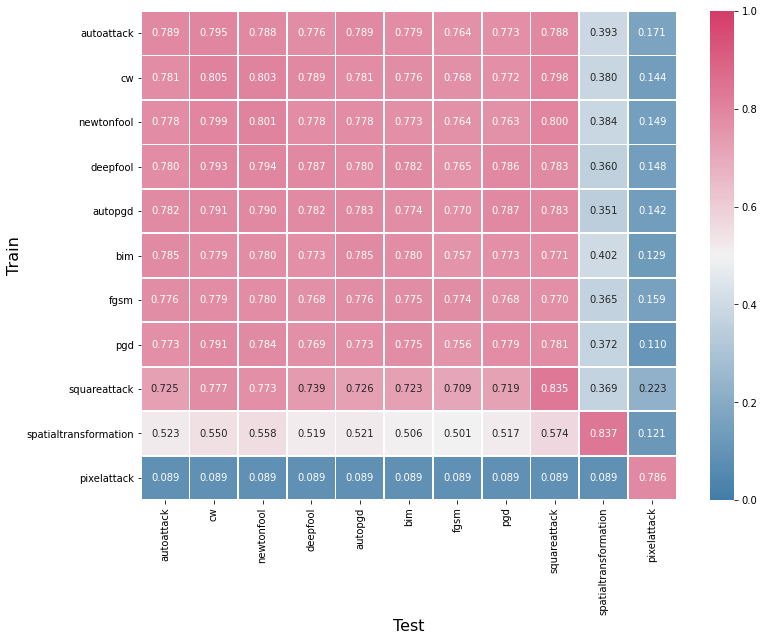

In [12]:
path = "plot/awp-accuracy-validation.png"

# Generate a custom diverging colormap
cmap = sns.diverging_palette(h_neg=240, h_pos=0,s=75, l=50, n=1, as_cmap=True)
plot_heatmap(sorted_acc.drop(columns=["all"]), cmap, path, 0, 1)

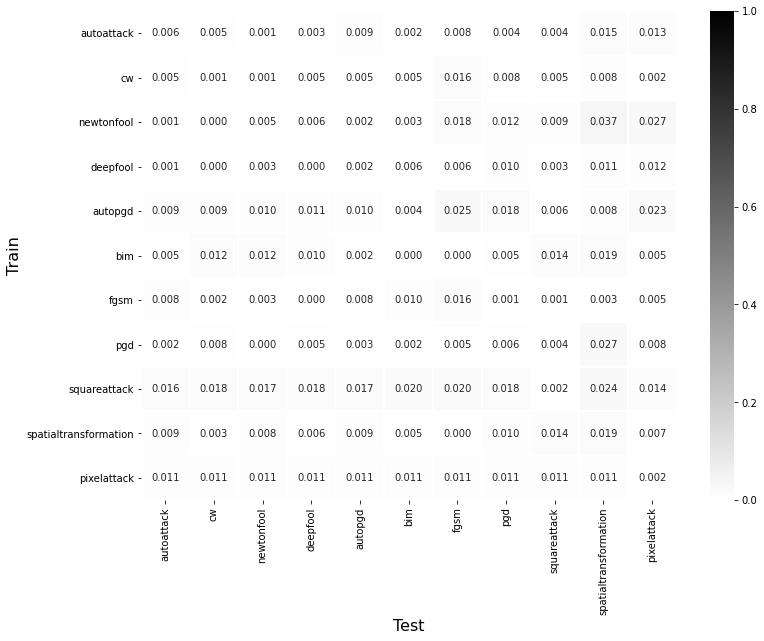

In [13]:
path = "plot/awp-diff-accuracy.png"

# cmap = sns.diverging_palette(h_neg=240, h_pos=0,s=75, l=50, n=1, as_cmap=True)
cmap = "gray_r"
plot_heatmap(abs(diff).drop(columns=["all"]), cmap, path, 0, 1)

In [14]:
# print(sorted_acc.to_latex(bold_rows=True))

In [15]:
accs_transpose, accs = get_accuracies(attacks, None)

In [16]:
cluster = {0: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool', 'squareattack'], 1: ['pixelattack'], 2: ['spatialtransformation']}
cluster

{0: ['autoattack',
  'autopgd',
  'bim',
  'cw',
  'fgsm',
  'pgd',
  'deepfool',
  'newtonfool',
  'squareattack'],
 1: ['pixelattack'],
 2: ['spatialtransformation']}

In [17]:
attacks

['autoattack',
 'autopgd',
 'bim',
 'cw',
 'fgsm',
 'pgd',
 'deepfool',
 'newtonfool',
 'squareattack',
 'pixelattack',
 'spatialtransformation']

In [18]:
def intra_similarity_the_same_train(arr) :
    if len(arr) <= 1 :
        return [0]
    res = []
    for i in range(len(arr)) :
        x1 = arr[i]
        for j in range(i+1, len(arr)) :
            x2 = arr[j]
            if x1 != x2 :
                for train in attacks :
                    val = abs(accs[train][x1] - accs[train][x2])
                    res.append(val)
    return res

def intra_similarity_the_same_test(arr) :
    if len(arr) <= 1 :
        return [0]
    res = []
    for i in range(len(arr)) :
        x1 = arr[i]
        for j in range(i+1, len(arr)) :
            x2 = arr[j]
            if x1 != x2 :
                for test in attacks :
                    val = abs(accs[x1][test] - accs[x2][test])
                    res.append(val)
    return res



In [21]:
len(intra_similarity_the_same_train(cluster[0]))

396

In [22]:
len(intra_similarity_the_same_test(cluster[0]))

396

In [26]:
data = {}
data["S(1)"] = intra_similarity_the_same_train(cluster[0])
data["S(2)"] = intra_similarity_the_same_test(cluster[0])

In [27]:
def inter_difference_the_same_train(cluster) :
    res = []
    calculated = set()
    for k1, v1 in cluster.items() :
        for k2, v2 in cluster.items() :
            if k1 != k2 :
                for a1 in v1 : 
                    for a2 in v2 :
                        idx = a1 + "-" + a2
                        if idx not in calculated :
                            for train in attacks :
                                val = abs(accs[train][a1] - accs[train][a2])
#                                 if val <= 0.1 :
#                                     print("Attack 1: ", a1)
#                                     print("Attack 2: ", a2)
#                                     print("Train: ", train)
                                res.append(val)
        
                                calculated.add(idx)
                                calculated.add(a2 + "-" + a1)
    return res

In [28]:
len(inter_difference_the_same_train(cluster))

209

In [29]:
def inter_difference_the_same_test(cluster) :
    res = []
    calculated = set()
    for k1, v1 in cluster.items() :
        for k2, v2 in cluster.items() :
            if k1 != k2 :
                for a1 in v1 : 
                    for a2 in v2 :
                        idx = a1 + "-" + a2
                        if idx not in calculated :
                            for test in attacks :
                                val = abs(accs[a1][test] - accs[a2][test])
#                                 if val <= 0.1 :
#                                     print("Attack 1: ", a1)
#                                     print("Attack 2: ", a2)
#                                     print("Test: ", test)
#                                     print("Abs Diff: {:.4f}".format(val))
#                                     print("")

                                res.append(val)
        
                                calculated.add(idx)
                                calculated.add(a2 + "-" + a1)
    return res

In [30]:
len(inter_difference_the_same_test(cluster))

209

In [31]:
diff_test = inter_difference_the_same_test(cluster)
min(diff_test)

0.004799999999999999

In [32]:
data["D(1)"] = inter_difference_the_same_train(cluster)
data["D(2)"] = inter_difference_the_same_test(cluster)

In [33]:
def d3(cluster) :
    res = []
    for i, c1 in cluster.items() :
        for j, c2 in cluster.items() :
            if i != j :
                for attack1train in c1 :
                    for attack1test in c1 :
                        for attack2test in c2 :
                            val = accs[attack1train][attack1test] - accs[attack1train][attack2test]
                            res.append(val)
    return res

In [34]:
len(d3(cluster))

182

In [35]:
data["D(3)"] = d3(cluster)

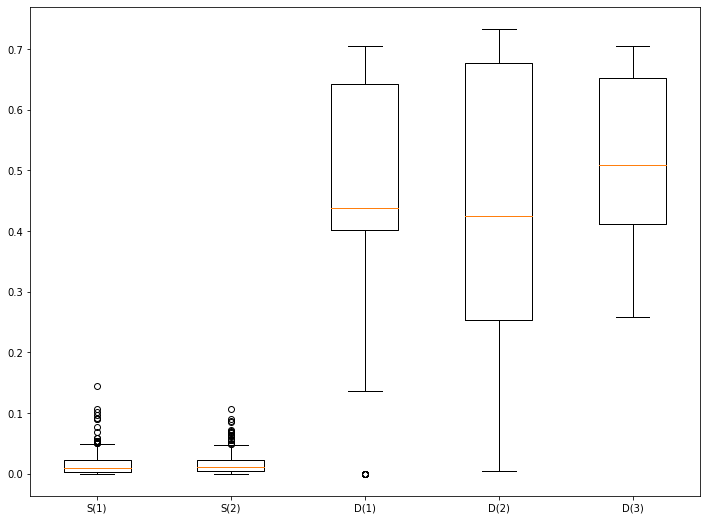

In [36]:
fig, ax = plt.subplots(figsize=(12,9))
ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
fpath = "plot/awp-detail-similarity.png"
fig.savefig(fpath, bbox_inches='tight')